In [1]:
from functools import partial
import tempfile

import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd

from sklearn import preprocessing, svm

In [2]:
import crosses

In [3]:
reduced_annotations = ['DP', 'HRun', 'MQRankSum', 'MQ0', 'QD', 'FS', 'ReadPosRankSum', 'AN']
reduced_annotations = ['QD', 'DP']

In [4]:
ds = crosses.get_train(reduced_annotations, normalize=False, scale=False)
ds.shape

(236454, 3)

In [5]:
train_ds = ds.sample(frac=0.02)
test_ds = ds[~ds.index.isin(train_ds.index)]
ds.shape, train_ds.shape, test_ds.shape

((236454, 3), (4729, 3), (231725, 3))

In [6]:
test_ds[test_ds['OK']==1].shape, test_ds[test_ds['OK']==0].shape

((199852, 3), (31873, 3))

## Before scaling and normalization

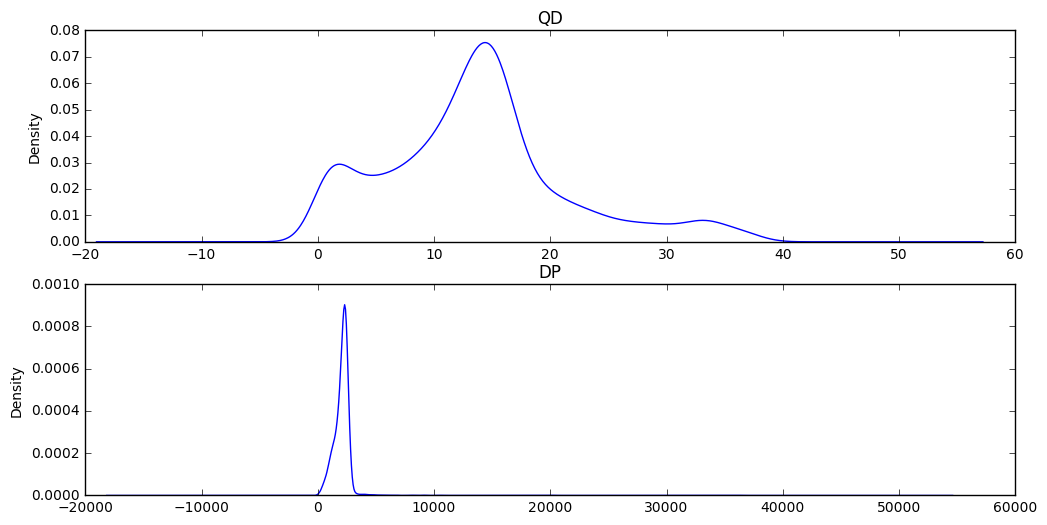

In [7]:
fig, axs = plt.subplots(len(reduced_annotations), figsize=(12, 3*len(reduced_annotations)))
for i, annotation in enumerate(reduced_annotations):
    train_ds[annotation].plot.kde(ax=axs[i])
    axs[i].set_title(annotation)

## After scaling and normalization

In [8]:
scaler = preprocessing.MinMaxScaler().fit(train_ds[reduced_annotations].values)

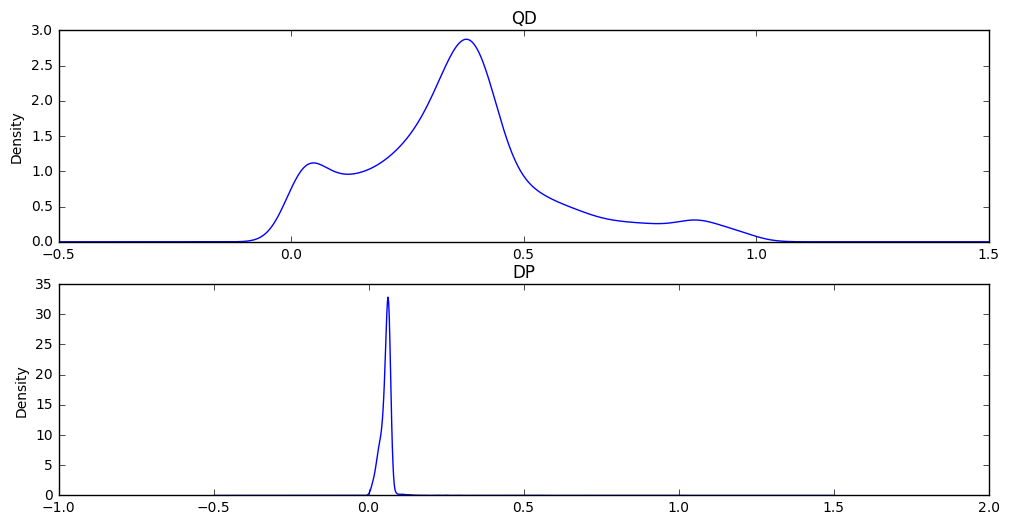

In [9]:
train_ds_scaled = pd.DataFrame(scaler.transform(train_ds[reduced_annotations].values),
                               columns=train_ds[reduced_annotations].columns)
fig, axs = plt.subplots(len(reduced_annotations), figsize=(12, 3*len(reduced_annotations)))
for i, annotation in enumerate(reduced_annotations):
    train_ds_scaled[annotation].plot.kde(ax=axs[i])
    axs[i].set_title(annotation)

In [10]:
clf = svm.SVC()
print(train_ds.shape)
x_train = scaler.transform(train_ds[reduced_annotations].values)
#x_train = train_ds[['OK']].values
y_train = train_ds['OK'].values
clf.fit(x_train, y_train)
#x = scaler.transform(test_ds[reduced_annotations].values)
#y = test_ds['OK'].values
#clf.score(x, y)
x_train.shape, y_train.shape

(4729, 3)


((4729, 2), (4729,))

In [11]:
from sklearn.model_selection import learning_curve
clf = svm.SVC()#max_iter=max_iter)
A = ['QD']
A = reduced_annotations
x_train = train_ds[A].values
y_train = train_ds['OK'].values
clf.fit(x_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(
        clf, x_train, y_train)

x_test = test_ds[A].values
y_test = test_ds['OK'].values
print(clf.score(x_test, y_test))

##preds = clf.predict(scaler.transform(test_ds[reduced_annotations].values))
#preds = clf.predict(test_ds[A].values)
#print(len(preds))
#for i, (v, pred, real) in enumerate(zip(x, preds, y)):
#    print(v, pred, real)
#    if i == 100:
#        break

0.859631028158


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
     

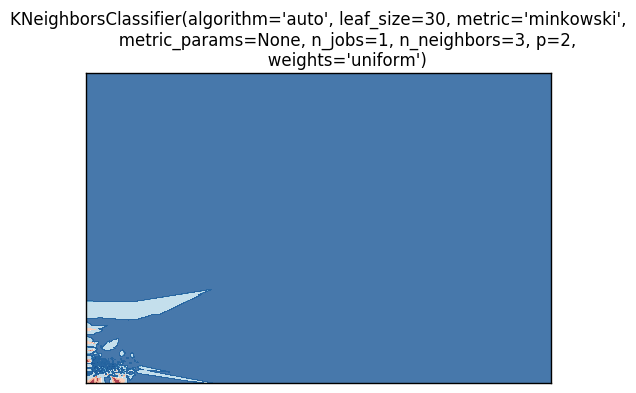

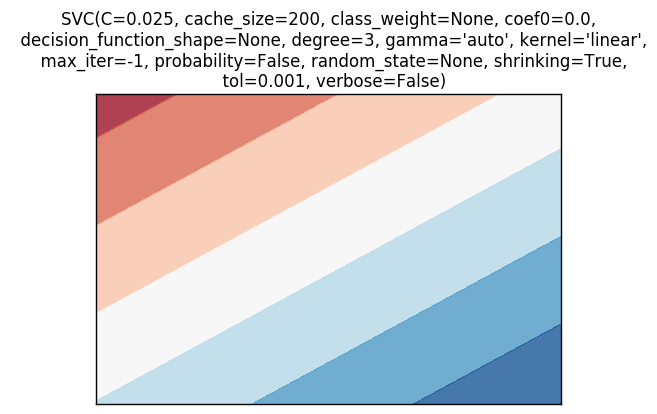

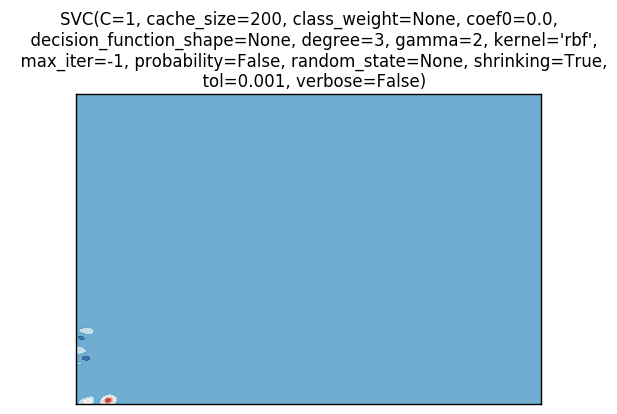

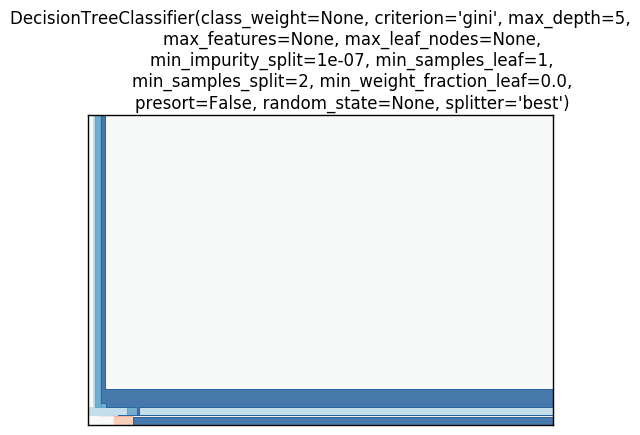

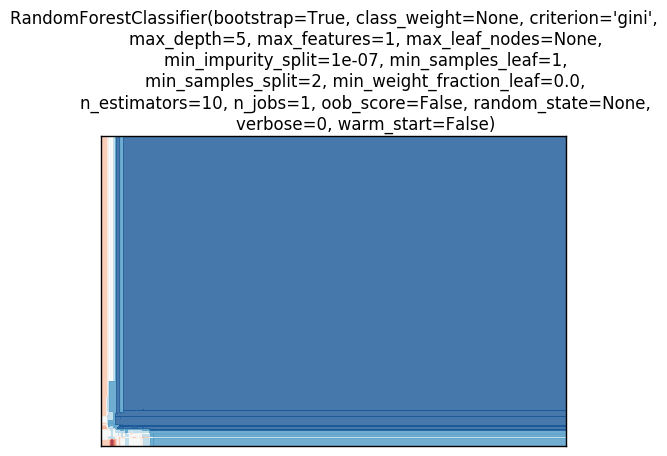

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ]

for classifier in classifiers:
    h = .02
    clf = classifier
    A = ['QD', 'DP']
    x_train = preprocessing.StandardScaler().fit_transform(train_ds[A].values)
    y_train = train_ds['OK'].values
    clf.fit(x_train, y_train)

    x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 1].max() + 0.5
    y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    fig, ax =  plt.subplots()
    cm = plt.cm.RdBu
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    print(str(classifier))
    ax.set_title(str(classifier))

In [13]:
test_scores

array([[ 0.8642993 ,  0.8642993 ,  0.8647619 ],
       [ 0.86303107,  0.8642993 ,  0.86222222],
       [ 0.86366519,  0.86303107,  0.8615873 ],
       [ 0.8642993 ,  0.86239696,  0.86031746],
       [ 0.8642993 ,  0.86239696,  0.86031746]])

In [14]:
x_test = scaler.transform(test_ds[reduced_annotations].values)
y_test = test_ds['OK'].values
x_test.size, y_test.size

(463450, 231725)

In [15]:
preds = clf.predict(scaler.transform(test_ds[reduced_annotations].values))
print(len(preds))
for i, (pred, real) in enumerate(zip(preds, y)):
    print(pred, real)
    if i == 100:
        break

231725


NameError: name 'y' is not defined

## Classifier

In [ ]:
clf = svm.SVC()
x_train = train_ds[reduced_annotations].values
#x_train = train_ds[['OK']].values
y_train = train_ds['OK'].values
clf.fit(x_train, y_train)

In [ ]:
clf = svm.SVC()
x_train = train_ds[reduced_annotations].values
x_train_scaled =  preprocessing.StandardScaler().fit(x_train)
y_train = train_ds['OK'].values
clf.fit(x_train, y_train)
x = test_ds[reduced_annotations].values
y = test_ds['OK'].values
clf.score(x, y)

In [ ]:
x = test_ds[reduced_annotations].values
#x = test_ds[['OK']].values
y = test_ds['OK'].values
clf.score(x, y)

In [ ]:
len(x)

In [ ]:
for a,b in zip(x,y):
    print(a, clf.predict(a), b)
    break

## Support info

In [ ]:
train_ds